In [1]:
import numpy as np 
import pandas as pd 

from src.utils import mkdir
from src.logger import init_logger
from src.builtin.estimators import TabNetClassifier
from sklearn.datasets import load_breast_cancer

SyntaxError: invalid syntax (estimator_base.py, line 514)

## init logger

In [ ]:
logger_dir = 'logs'
logger_name = 'TEST'
level = 'INFO'

logger = init_logger(logger_dir=logger_dir, logger_name=logger_name, level=level)

## load data

In [ ]:
X, y = load_breast_cancer(return_X_y=True)

print(X.shape)
print(y.shape)

## Build Model

In [ ]:
tabnet = TabNetClassifier(
    input_dims=30, output_dims=[1], logger=logger, is_cuda=True,
    reprs_dims=4, atten_dims=4, num_steps=4, num_indep=2, num_shared=1
)

In [ ]:
tabnet.build(path='zzzzz')

In [2]:
tabnet.fit(X, y.reshape(-1, 1), batch_size=512, metrics=['acc'], max_epochs=200)

NameError: name 'tabnet' is not defined

In [7]:
m_explain, masks = tabnet.explain(X)

In [8]:
m_explain.size()

torch.Size([512, 30])

In [9]:
m_explain[0, ...]

tensor([0.0000, 0.0000, 0.1056, 0.0000, 0.0000, 0.0000, 0.0000, 2.2965, 0.1575,
        0.0000, 0.0105, 0.1334, 0.0556, 0.0000, 0.0000, 0.0000, 0.1152, 0.3430,
        0.6227, 0.0000, 0.0000, 0.0570, 1.0023, 0.0000, 0.0000, 0.0634, 0.3141,
        0.0000, 0.0000, 0.0206], device='cuda:0')

In [10]:
m_explain[1, ...]

tensor([1.2728, 0.0000, 0.6932, 0.0000, 0.0000, 0.1962, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5814, 0.5406, 0.0000,
        0.0000, 0.0000, 0.8675, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.8407, 0.0000, 0.3546], device='cuda:0')

In [11]:
m_explain[2, ...]

tensor([0.5186, 0.0000, 0.1009, 0.0000, 0.3491, 0.0659, 0.0000, 2.0697, 0.2154,
        0.0000, 0.0955, 0.3996, 0.0000, 0.2295, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.6857, 0.1564, 0.7877, 0.0148, 0.3355,
        0.0000, 0.0000, 0.0000], device='cuda:0')

In [13]:
import matplotlib.pyplot as plt

[2021-01-26 22:22:17,851][INFO]Generating new fontManager, this may take some time...


Text(0.5, 1.0, 'importance')

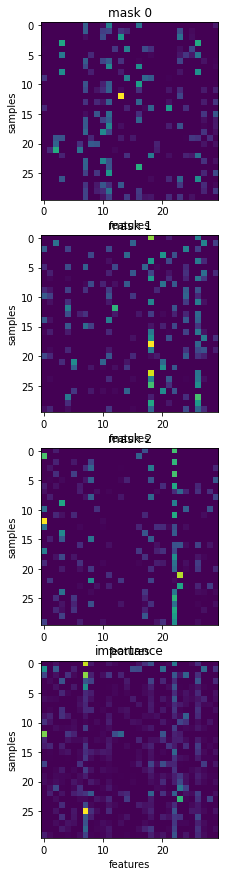

In [35]:
fig, axs = plt.subplots(4, 1, figsize=(15,15))

for i in range(3):
    axs[i].imshow(masks[i].cpu().numpy()[:30])
    axs[i].set_xlabel('features')
    axs[i].set_ylabel('samples')
    axs[i].set_title(f"mask {i}")

axs[3].imshow(m_explain.cpu().numpy()[:30, :])
axs[3].set_xlabel('features')
axs[3].set_ylabel('samples')
axs[3].set_title('importance')

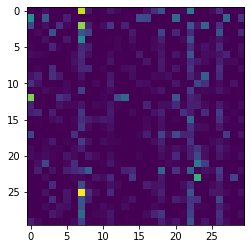

In [29]:
plt.imshow(m_explain.cpu().numpy()[:30, :])

In [16]:
from scipy.sparse import csc_matrix
import scipy

In [17]:
create_explain_matrix(30, [], [], 30)

NameError: name 'create_explain_matrix' is not defined

In [ ]:
def create_explain_matrix(input_dim, cat_emb_dim, cat_idxs, post_embed_dim):
    """
    This is a computational trick.
    In order to rapidly sum importances from same embeddings
    to the initial index.
    Parameters
    ----------
    input_dim : int
        Initial input dim
    cat_emb_dim : int or list of int
        if int : size of embedding for all categorical feature
        if list of int : size of embedding for each categorical feature
    cat_idxs : list of int
        Initial position of categorical features
    post_embed_dim : int
        Post embedding inputs dimension
    Returns
    -------
    reducing_matrix : np.array
        Matrix of dim (post_embed_dim, input_dim)  to performe reduce
    """

    if isinstance(cat_emb_dim, int):
        all_emb_impact = [cat_emb_dim - 1] * len(cat_idxs)
    else:
        all_emb_impact = [emb_dim - 1 for emb_dim in cat_emb_dim]

    acc_emb = 0
    nb_emb = 0
    indices_trick = []
    for i in range(input_dim):
        if i not in cat_idxs:
            indices_trick.append([i + acc_emb])
        else:
            indices_trick.append(
                range(i + acc_emb, i + acc_emb + all_emb_impact[nb_emb] + 1)
            )
            acc_emb += all_emb_impact[nb_emb]
            nb_emb += 1

    reducing_matrix = np.zeros((post_embed_dim, input_dim))
    for i, cols in enumerate(indices_trick):
        reducing_matrix[cols, i] = 1

    return scipy.sparse.csc_matrix(reducing_matrix)

In [ ]:
for key, value in masks.items():
                masks[key] = csc_matrix.dot(
                    value.cpu().detach().numpy(), self.reducing_matrix
                )

            res_explain.append(
                csc_matrix.dot(M_explain.cpu().detach().numpy(), self.reducing_matrix)
            )


In [ ]:
tabnet.predict(X)[0].reshape(-1)

In [ ]:
y

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 